# Uso de Dispositivos Móviles
En esta actividad, realizaremos un análisis exploratorio de datos (EDA) sobre un dataset que contiene información detallada acerca de los patrones de uso de dispositivos móviles y el comportamiento de los usuarios. Este análisis nos permitirá identificar tendencias clave y relaciones entre diversas características, como el tiempo de uso diario, el número de aplicaciones utilizadas, la edad, el género, y otras variables relevantes.

El objetivo principal del EDA es obtener una comprensión profunda de cómo los usuarios interactúan con sus dispositivos móviles, explorando la distribución de las variables, detectando posibles outliers y evaluando correlaciones entre las características. Asimismo, el análisis nos servirá para identificar grupos de usuarios con comportamientos similares y detectar posibles factores que influyen en el uso diario de los dispositivos.

Este análisis exploratorio será la base para la construcción de futuros modelos predictivos, ya sean de regresión o clasificación, que nos permitan estimar variables clave como el tiempo diario de uso de cada usuario en función de sus características demográficas y patrones de uso. La comprensión que obtengamos en esta fase inicial será fundamental para la toma de decisiones en las siguientes etapas del análisis.

# Librerías

Las librerías que utilizaremos para esta actividad son:

In [213]:
# Procesado y Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



# Configuración de las Gráficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","purple","#fcbf49"]
sns.set_theme( palette= palette, context= "notebook")


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Ingesta de Datos
A continuación, cargaremos el conjunto de datos que utilizaremos para realizar el análisis exploratorio de datos (EDA). Verificaremos que los datos se hayan cargado correctamente y que estén listos para el proceso de análisis.

Puedes acceder al conjunto de datos que utilizaremos para llevar a cabo el análisis a través del siguiente en enlace:

[Descargar Conjunto de Datos](https://drive.google.com/uc?export=download&id=18iedT3NTOoHEsX608J0k5tCrC1PSddNc)


In [214]:
# cargamos el conjunto de datos para llevar a cabo el análisis de datos
# ==============================================================================

df = pd.read_csv('user_behavior_dataset.csv')
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


Se observa que el conjunto de datos contiene 700 filas y 11 columnas. A continuación, describiremos cada una de las columnas presentes en el dataset:

- **User ID**: Identificador único para cada usuario.

- **Device Model**: Modelo del dispositivo móvil utilizado por cada usuario.

- **Operating System**: Sistema operativo instalado en el dispositivo, ya sea Android o iOS.

- **App Usage Time**: Tiempo diario dedicado a las aplicaciones en el dispositivo, medido en minutos.

- **Screen on Time**: Tiempo promedio (en horas al día) que la pantalla del dispositivo permanece activa.

- **Battery Drain**: Consumo diario promedio de la batería del dispositivo móvil, medido en miliamperios (mAh).

- **Number of Apps Installed**: Número de aplicaciones instaladas en el dispositivo.

- **Data Usage**: Consumo diario promedio de datos móviles, medido en megabytes (MB).

- **Age**: Edad del usuario.

- **Gender**: Género del usuario (masculino o femenino).

- **Use Behavior Class**: Clasificación del comportamiento del usuario en función de sus patrones de uso, en una escala de 1 a 5.

A continuación, procederemos a modificar los nombres de las columnas del conjunto de datos para hacerlos más consistentes y fáciles de interpretar.


In [215]:
# Renombramos las columnas a español
# ==============================================================================

df.rename(columns={
    'User ID': 'ID de Usuario',
    'Device Model': 'Modelo del Dispositivo',
    'Operating System': 'Sistema Operativo',
    'App Usage Time (min/day)': 'Tiempo de Uso de la App (min/día)',
    'Screen On Time (hours/day)': 'Tiempo de Pantalla Encendida (horas/día)',
    'Battery Drain (mAh/day)': 'Consumo de Batería (mAh/día)',
    'Number of Apps Installed': 'Número de Apps Instaladas',
    'Data Usage (MB/day)': 'Uso de Datos (MB/día)',
    'Age': 'Edad',
    'Gender': 'Género',
    'User Behavior Class': 'Clase de Comportamiento del Usuario'
}, inplace=True)

# Verificamos los nuevos nombres de las columnas
# ==============================================================================

df.columns

Index(['ID de Usuario', 'Modelo del Dispositivo', 'Sistema Operativo',
       'Tiempo de Uso de la App (min/día)',
       'Tiempo de Pantalla Encendida (horas/día)',
       'Consumo de Batería (mAh/día)', 'Número de Apps Instaladas',
       'Uso de Datos (MB/día)', 'Edad', 'Género',
       'Clase de Comportamiento del Usuario'],
      dtype='object')

# 2. Análisis Exploratorio de Datos

A continuación, realizaremos el análisis exploratorio de datos (EDA) sobre el conjunto de datos cargado. Iniciaremos con tareas de limpieza y preparación de los datos para identificar y corregir posibles inconsistencias que puedan afectar la calidad del análisis. Una vez finalizada esta etapa, llevaremos a cabo un análisis univariado, bivariado y multivariado con el objetivo de identificar tendencias, patrones, y las características más relevantes del comportamiento de los usuarios en relación con el uso de dispositivos móviles.

## 2.1 Resumen de Datos

A continuación, realizaremos un resumen de nuestro conjunto de datos, lo que nos permitirá tener una visión general de su estructura. Este paso es clave para obtener una comprensión inicial del dataset, ya que nos ayudará a identificar el tipo de dato presente en cada columna y verificar si están correctamente asignados o si es necesario realizar ajustes para garantizar la consistencia y precisión en el análisis posterior.

In [216]:
# Obtenemos un resumen de los datos del conjunto de datos 
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID de Usuario                             700 non-null    int64  
 1   Modelo del Dispositivo                    700 non-null    object 
 2   Sistema Operativo                         700 non-null    object 
 3   Tiempo de Uso de la App (min/día)         700 non-null    int64  
 4   Tiempo de Pantalla Encendida (horas/día)  700 non-null    float64
 5   Consumo de Batería (mAh/día)              700 non-null    int64  
 6   Número de Apps Instaladas                 700 non-null    int64  
 7   Uso de Datos (MB/día)                     700 non-null    int64  
 8   Edad                                      700 non-null    int64  
 9   Género                                    700 non-null    object 
 10  Clase de Comportamiento del Usuario   

Se observa que el tipo de dato presente en cada columna es el correcto, lo que nos permite continuar con las tareas de limpieza del conjunto de datos sin necesidad de realizar ajustes en este aspecto.

## 2.2 Valores Faltantes

A continuación, verificaremos la presencia de valores faltantes en nuestro conjunto de datos. Dado que contamos con 700 observaciones, es fundamental detectar y tratar adecuadamente estos valores, ya que su manejo inadecuado podría generar efectos negativos en el análisis y conducir a resultados poco precisos. Esto, a su vez, podría llevar a errores en los insights obtenidos y afectar la toma de decisiones basada en datos.

In [217]:
# Verificamos si existen valores nulos en el conjunto de datos 
# ==============================================================================

df.isnull().sum()

ID de Usuario                               0
Modelo del Dispositivo                      0
Sistema Operativo                           0
Tiempo de Uso de la App (min/día)           0
Tiempo de Pantalla Encendida (horas/día)    0
Consumo de Batería (mAh/día)                0
Número de Apps Instaladas                   0
Uso de Datos (MB/día)                       0
Edad                                        0
Género                                      0
Clase de Comportamiento del Usuario         0
dtype: int64

No se ha detectado la presencia de valores faltantes en ninguna de las columnas de nuestro conjunto de datos, lo que nos permite proceder con el análisis sin necesidad de realizar imputaciones o ajustes adicionales.

## 2.3 Valores Duplicados

A continuación, identificaremos si existen registros duplicados en nuestro conjunto de datos. Este paso es fundamental, ya que la presencia de valores duplicados puede sesgar el análisis y afectar la validez de los resultados. Es necesario asegurarnos de que cada observación en el conjunto de datos sea única y representativa.

Dado que contamos con solo 700 observaciones, la existencia de registros duplicados podría distorsionar el análisis al hacer que ciertas observaciones estén sobrerrepresentadas, lo que puede llevar a insights imprecisos. Es importante mencionar que no consideraremos el User ID en esta detección, ya que, aunque cada usuario tenga un identificador diferente, las demás características podrían ser exactamente iguales.

In [218]:
# Identificamos si hay valores duplicados en el conjunto de datos
# ==============================================================================

df.drop('ID de Usuario', axis=1).duplicated().sum()

0

Se ha verificado que no hay registros duplicados en el conjunto de datos, lo que nos permite confirmar que cada observación es única y representativa.

## 2.4 Eliminación de Características

Procederemos a eliminar las siguientes características que no aportan información relevante para el análisis exploratorio de datos y que, por el contrario, podrían afectar el proceso:

- **ID de Usuario:** Este campo es solo un identificador único para cada observación en el conjunto de datos, por lo que puede ser eliminado, ya que no proporciona información significativa sobre cada usuario.


- **Clase de Comportamiento del Usuario:** Aunque esta característica agrupa a los usuarios con comportamientos similares en relación con los dispositivos móviles, no se especifica el método utilizado para realizar estas agrupaciones ni su efectividad. Esto limita la validez de la información que ofrece, por lo que también se recomienda su eliminación. Además, el número de escala al que pertenece cada grupo no describe adecuadamente las características específicas de cada uno.

Se podría considerar generar una clasificación de los usuarios basada en sus características principales mediante la creación de modelos de clasificación no supervisada. Esto nos permitiría comprender, a través de métricas de bondad de ajuste, la efectividad de la identificación de cada grupo de usuarios dentro de nuestro conjunto de datos.

In [219]:
# Eliminamos las columnas que no aportan información relevante para el análisis
# ==============================================================================

df.drop(['ID de Usuario', 'Clase de Comportamiento del Usuario'], axis=1, inplace=True)


# Verificamos que las columnas se hayan eliminado correctamente
# ==============================================================================

df.columns

Index(['Modelo del Dispositivo', 'Sistema Operativo',
       'Tiempo de Uso de la App (min/día)',
       'Tiempo de Pantalla Encendida (horas/día)',
       'Consumo de Batería (mAh/día)', 'Número de Apps Instaladas',
       'Uso de Datos (MB/día)', 'Edad', 'Género'],
      dtype='object')

## 2.4 Valores Atípicos

Ahora procederemos a detectar los valores atípicos presentes en las variables numéricas utilizando diagramas de caja. Esta herramienta nos permitirá identificar visualmente las observaciones que se desvían de manera significativa del resto de los datos. Además, será necesario determinar si las observaciones clasificadas como atípicas en cada variable numérica corresponden a datos válidos o, por el contrario, son errores en el ingreso de datos que deben ser eliminados, ya que podrían sesgar el análisis.

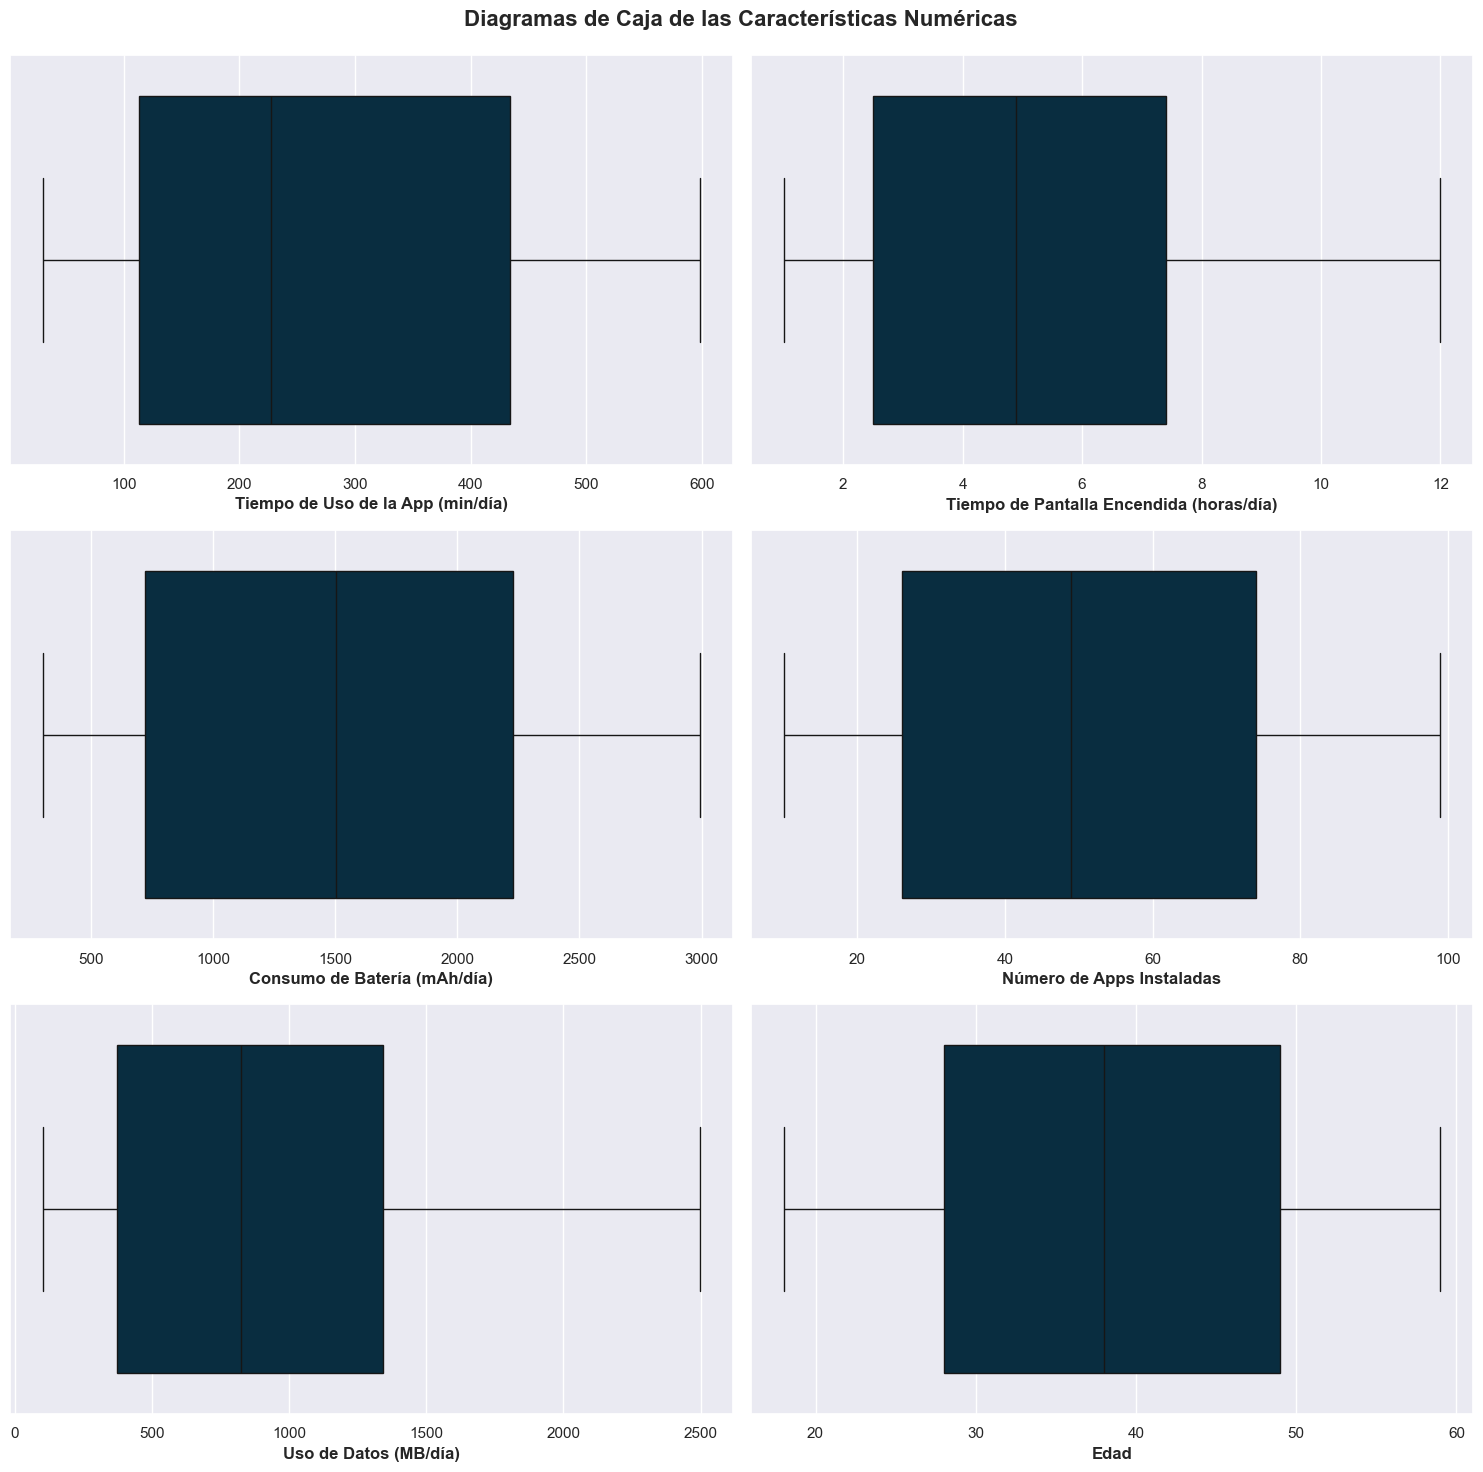

In [220]:
# Definimos las características numéricas del conjunto de datos
# ==============================================================================

caracteristicas_numericas =  df.select_dtypes(include = [np.number])


# Creamos un gráfico de caja para cada una de las características numéricas del conjunto de datos
# ==============================================================================
fig, axes = plt.subplots(nrows= round(len(caracteristicas_numericas.columns) / 2), 
                         ncols=2, 
                         figsize=(15, 15)
                         )

# Generamos los gráficos de caja para cada una de las características numéricas del conjunto de datos 
# ==============================================================================

for i, column in enumerate(caracteristicas_numericas.columns):
    sns.boxplot(x= df[column], ax= axes.flatten()[i])
    
    axes[i//2, i%2].set_xlabel(caracteristicas_numericas.columns[i], 
                               fontsize=12, 
                               weight='bold'
                               )
    
fig.suptitle('Diagramas de Caja de las Características Numéricas', fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
 

Se ha verificado que no hay presencia de valores atípicos en ninguna de las variables numéricas de nuestro conjunto de datos. Esto sugiere que no existen errores en el ingreso de datos, incluso si se han registrado observaciones que están fuera de los límites establecidos. Por lo tanto, podemos proceder a realizar el análisis univariado sobre todas las variables del conjunto, tanto numéricas como categóricas. Este análisis nos permitirá identificar la distribución de cada variable y obtener los estadísticos descriptivos más relevantes, lo que contribuirá a enriquecer nuestro análisis

## 2.5 Análisis Univariado

Procederemos a realizar el análisis univariado sobre el conjunto de datos, lo que nos permitirá comprender cómo están distribuidos los datos, examinar sus estadísticas descriptivas y detectar posibles patrones. Utilizaremos resúmenes estadísticos para calcular los estadísticos más relevantes de cada variable, complementados con representaciones gráficas como histogramas.

En primer lugar, enfocaremos el análisis univariado en las características cuantitativas de nuestro conjunto de datos. Esto se llevará a cabo mediante representaciones gráficas y el cálculo de estadísticas descriptivas que nos ayuden a entender en profundidad el comportamiento de cada variable de manera individual en nuestro conjunto de datos.

### 2.5.1 Análisis Univariado de las Variables Cuantitativas

Comenzaremos con el cálculo de los estadísticos descriptivos más importantes de las variables numéricas, lo que nos permitirá extraer información relevante sobre el comportamiento de cada variable.

In [221]:
# Calculamos los estadísticos descriptivos de las características numéricas del conjunto de datos
# ==============================================================================

df.select_dtypes(include=[np.number]).describe()

,Tiempo de Uso de la App (min/día),Tiempo de Pantalla Encendida (horas/día),Consumo de Batería (mAh/día),Número de Apps Instaladas,Uso de Datos (MB/día),Edad
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


De los estadísticos descriptivos, podemos observar lo siguiente:

- **Tiempo de Uso de la App:** El mínimo registrado es de 30 minutos, lo que indica que algunos usuarios utilizan su dispositivo de manera limitada. Al menos el 25% de los usuarios en el conjunto de datos utilizan el dispositivo por 113 minutos o menos, lo que significa que aproximadamente 2 horas al día es el tiempo de uso más bajo para una cuarta parte de los usuarios. Por otro lado, al menos el 75% de los usuarios utilizan el dispositivo por 434 minutos o menos, lo que corresponde a aproximadamente 7.2 horas al día. Esto indica que uno de cada cuatro usuarios en el conjunto de datos pasa más de 7 horas al día en su dispositivo móvil. El máximo registrado es de 598 minutos al día, equivalente a cerca de 10 horas. Además, el 50% de los usuarios tiene un tiempo de uso entre 113 minutos y 434 minutos al día, lo que sugiere una amplia variabilidad en los patrones de uso.

- **Tiempo de Pantalla Encendida:** La media de tiempo de pantalla encendida es de 5.27 horas, con un mínimo de 1 hora y un máximo de 12 horas. Esto indica que algunos usuarios tienen un uso moderado, mientras que otros pueden estar muy expuestos a sus dispositivos. Al menos el 50% de las personas tiene la pantalla encendida 4.9 horas o menos al día, y al menos el 75% de los usuarios la tiene encendida 7.4 horas o menos al día, sugiriendo que la mayoría de los usuarios no supera las 7 horas de uso continuo.

- **Consumo de Batería:** El consumo medio de batería es de 1525 miliamperios al día, con un mínimo de 302 miliamperios y un máximo de 2993 miliamperios. Se espera una correlación entre esta variable y el tiempo de pantalla encendida, ya que un mayor tiempo de uso generalmente implica un mayor consumo de batería. Este hallazgo es crucial para entender la duración de la batería de los dispositivos y la experiencia del usuario.

- **Número de Aplicaciones Instaladas:** El mínimo se sitúa en 10 aplicaciones, mientras que la media es de 50 aplicaciones. Sin embargo, la alta desviación estándar de 26 aplicaciones indica que la cantidad de aplicaciones varía considerablemente entre los usuarios. Al menos el 75% de las personas tiene 74 o menos aplicaciones instaladas, y la mitad de los usuarios tiene entre 26 y 74 aplicaciones. El máximo registrado es de 99 aplicaciones, lo que sugiere que algunos usuarios tienden a descargar más aplicaciones que otros, posiblemente reflejando diferentes necesidades o hábitos de uso.

- **Uso de Datos:** La media de uso de datos es de 929 megabytes por día, con un mínimo de 102 megabytes. Al menos el 50% de los usuarios utiliza 823 megabytes o más al día, lo que indica que un consumo moderado de datos es común. El máximo de uso de datos por día es de 2497 megabytes, lo que puede reflejar un uso intensivo de aplicaciones que requieren más datos, como streaming o redes sociales.

- **Edad:** La media de edad se establece en aproximadamente 38 años, con un mínimo de 12 años, lo que sugiere que los registros incluyen usuarios que no han alcanzado la mayoría de edad. Solo el 25% de los usuarios tiene 49 años o más, lo que implica que la mayoría de los usuarios son relativamente jóvenes. El máximo de edad registrado es de 59 años, y la mitad de los usuarios del conjunto de datos oscila entre los 28 y 49 años, lo que sugiere un grupo de usuarios principalmente adulto.

Ahora, procederemos a realizar las representaciones gráficas que nos permitirán comprender cómo están distribuidas las variables cuantitativas de nuestro conjunto de datos.

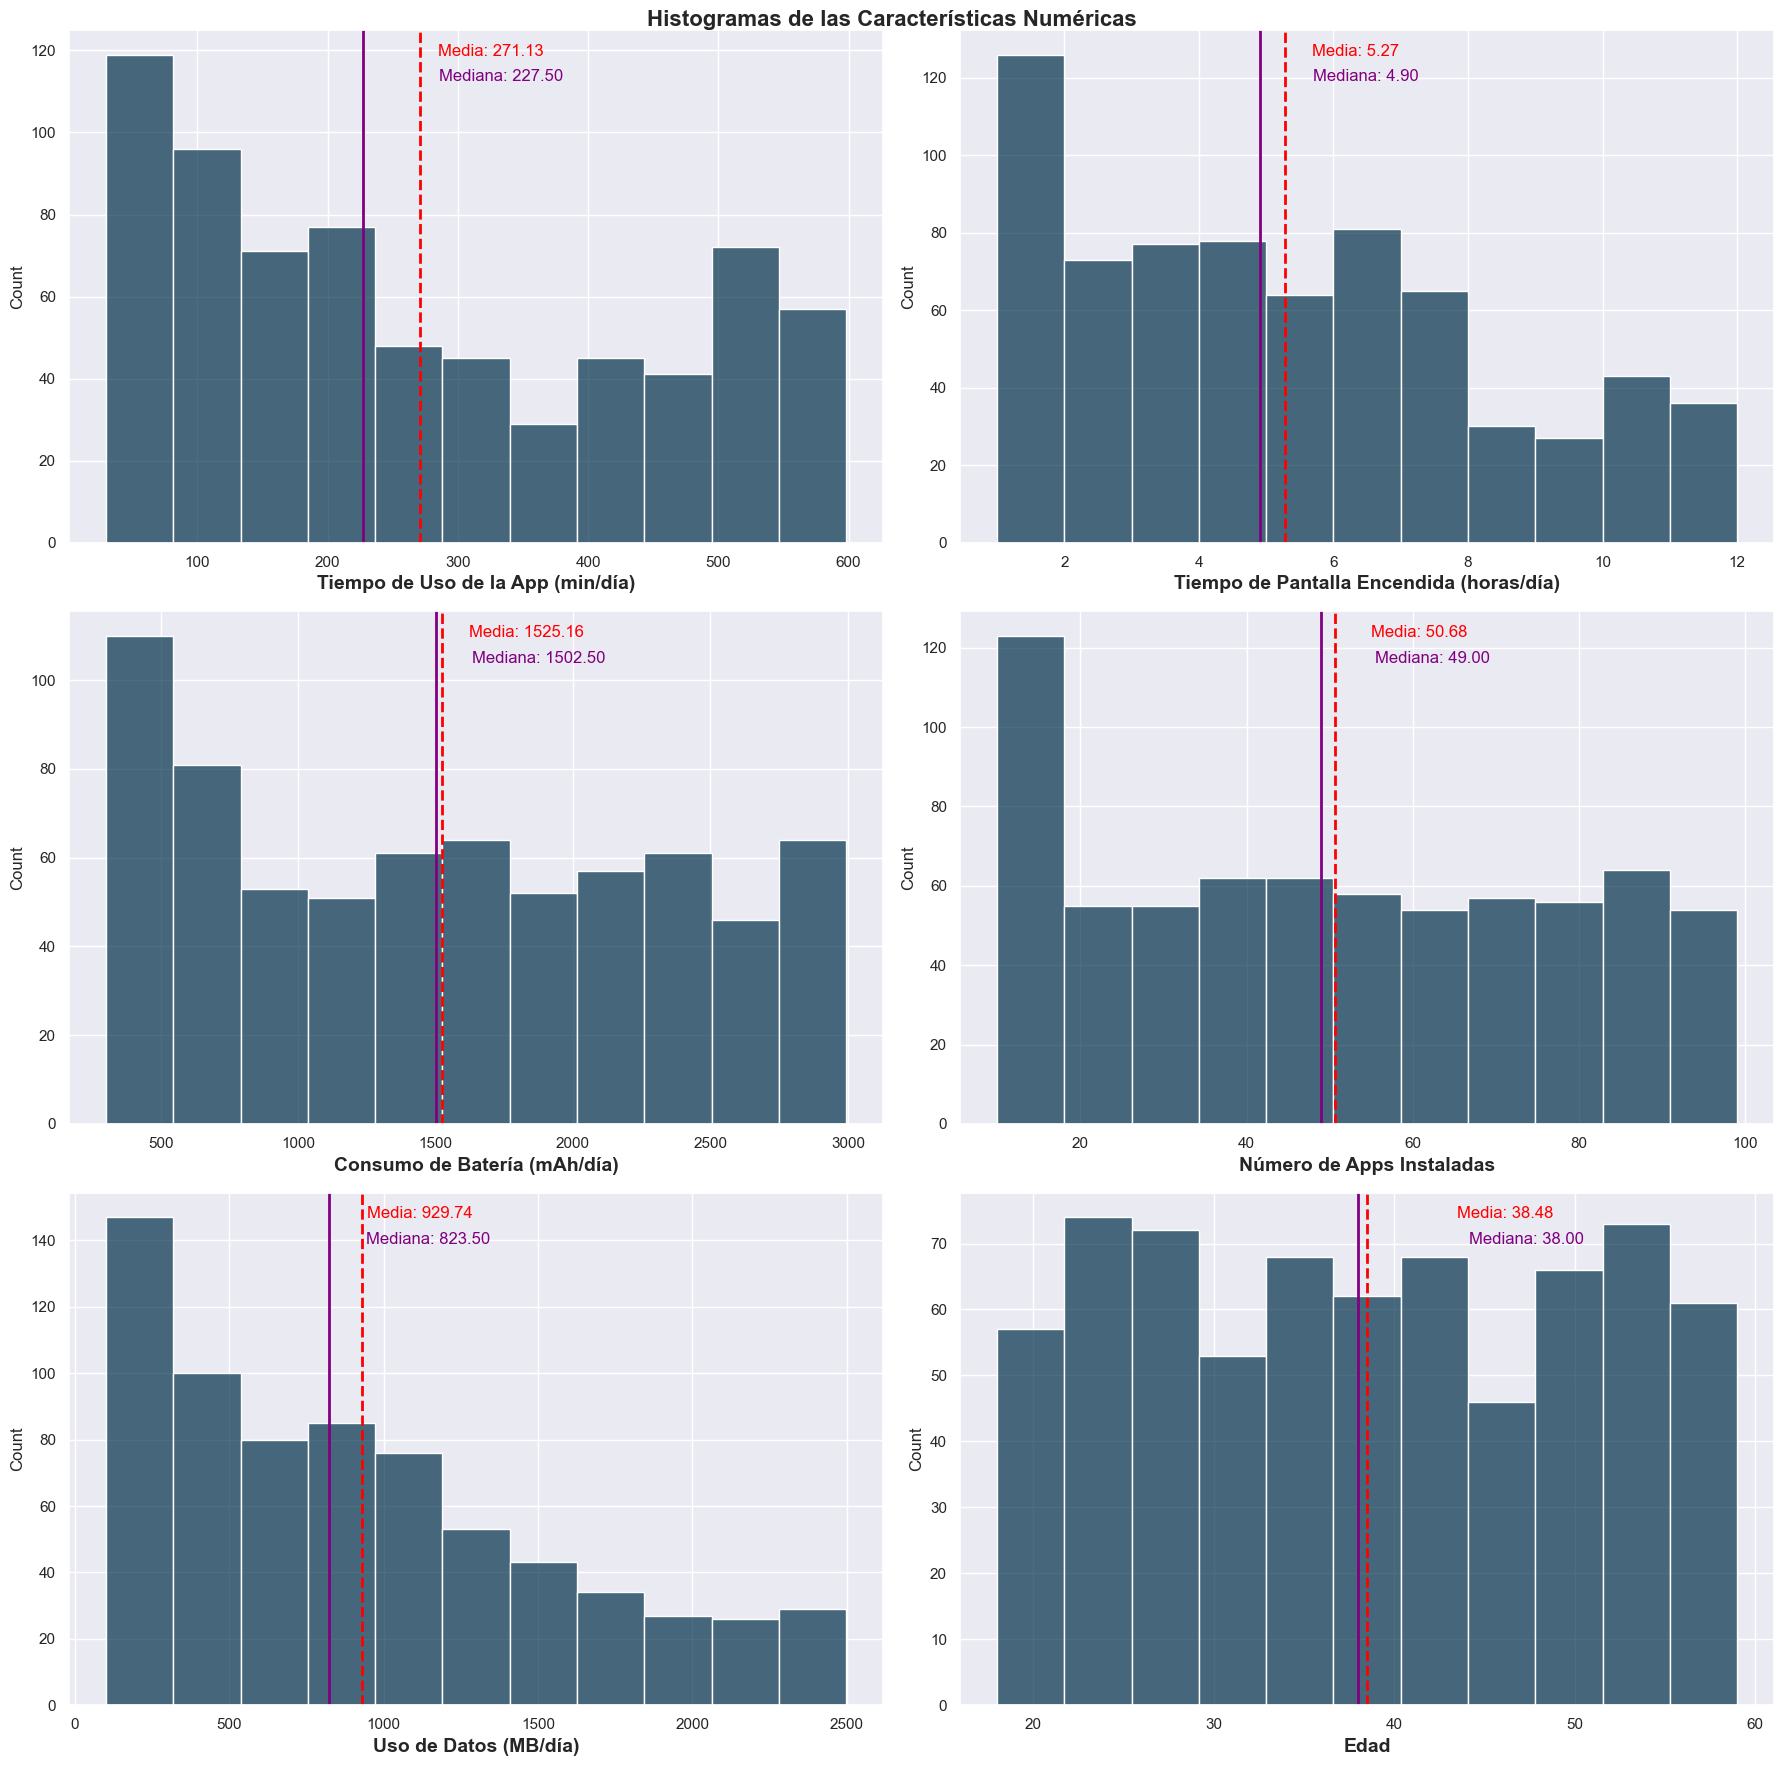

In [222]:

# Creamos una figura con subplots
# ==============================================================================

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

# Graficamos cada variable numérica
# ==============================================================================

for i, col in enumerate(caracteristicas_numericas.columns):
    ax = axes[i]
    sns.histplot(df[col], kde=False, ax=ax, alpha=0.7)
    
    mean = df[col].mean()
    median = df[col].median()
    
    ax.axvline(mean, color='red', linestyle='--', linewidth=2)
    ax.axvline(median, color='purple', linestyle='-', linewidth=2)
    
    ax.text( x=df.select_dtypes(include= [np.number]).iloc[:, i].mean()*1.2, y= ax.get_ylim()[1] * 0.95, s= f'Media: {mean:.2f}', color='red', ha='center')
    ax.text(x=df.select_dtypes(include= [np.number]).iloc[:, i].mean()*1.23, y= ax.get_ylim()[1] * 0.9, s=f'Mediana: {median:.2f}', color='purple', ha='center')
    
    ax.set_xlabel(df.select_dtypes(include= [np.number]).columns[i], 
                               fontsize=14, 
                               weight='bold'
                               )

plt.suptitle('Histogramas de las Características Numéricas', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

De las representaciones gráficas, podemos observar lo siguiente:

- **Tiempo de Uso del Dispositivo Móvil:** La mayoría de los usuarios se concentra en torno a los 100 minutos de uso diario. A medida que aumenta el tiempo de uso, disminuye la cantidad de observaciones, lo que indica que el uso prolongado del dispositivo es menos común. Sin embargo, se observa un ligero repunte en el intervalo de 500 a 600 minutos, lo que sugiere que, aunque la mayoría utiliza el dispositivo por períodos cortos, hay un grupo notable de usuarios que lo utiliza durante largos períodos, alcanzando hasta 10 horas.

- **Tiempo de Pantalla Encendida:** La mayor cantidad de observaciones se encuentra por debajo de las 2 horas. A partir de este punto, el comportamiento se vuelve relativamente uniforme, aunque la cantidad de usuarios disminuye significativamente al superar las 8 horas de uso. Esto indica que pocos usuarios tienen la pantalla encendida durante períodos prolongados, sugiriendo una preferencia por un uso moderado.

- **Consumo de Batería:** Esta variable también presenta un comportamiento uniforme, con un ligero aumento en las observaciones cuando el consumo es inferior a 500 miliamperios. Además, se puede notar que la media y la mediana están muy cercanas, lo que indica una distribución relativamente simétrica y sugiere que no hay valores extremos que alteren significativamente el promedio.

- **Número de Aplicaciones Instaladas:** La distribución de aplicaciones instaladas es uniforme, con un notable aumento en el número de usuarios que tienen menos de 20 aplicaciones. Esto indica que la mayoría de las personas tienen instaladas menos de 20 aplicaciones. A partir de este punto, la cantidad de usuarios respecto a la cantidad de aplicaciones se vuelve más constante, mostrando que, una vez alcanzado un cierto número de aplicaciones, los patrones de instalación tienden a estabilizarse.

- **Uso de Datos:** A medida que aumenta la cantidad de megabytes utilizados, se observa que hay una menor cantidad de usuarios. Esto sugiere que el consumo de datos es más frecuente entre un grupo más pequeño de usuarios, posiblemente aquellos que utilizan aplicaciones que requieren más datos, como streaming de video o música.

- **Edad:** La distribución de la edad presenta una forma relativamente uniforme, lo que indica que la población seleccionada para el conjunto de datos no tiene un sector sobre-representado. Esto sugiere que los datos son representativos de una amplia variedad de edades, lo que es beneficioso para un análisis más exhaustivo.

Ahora procederemos a llevar a cabo el análisis univariado sobre las variables categóricas del conjunto de datos.

### 2.5.2 Análisis Univariado de las variables Cualitativas
A continuación, procederemos a calcular los estadísticos descriptivos más importantes para las variables cualitativas de nuestro conjunto de datos. Esto incluye frecuencias absolutas y relativas, así como la moda, que nos permitirá identificar las categorías predominantes en cada variable. A partir de estos resultados, realizaremos la interpretación correspondiente.

El análisis de las variables cualitativas es esencial para identificar patrones recurrentes dentro de las categorías y comprender mejor cómo se comportan los diferentes grupos. Este análisis puede revelar, por ejemplo, si ciertos comportamientos o características están más presentes en un grupo particular de usuarios o si las categorías están distribuidas de manera homogénea en la población.

In [223]:
# Hallamos los estadísticos descriptivos de las características categóricas del conjunto de datos
# ==============================================================================

df.describe(include="object")

,Modelo del Dispositivo,Sistema Operativo,Género
count,700,700,700
unique,5,2,2
top,Xiaomi Mi 11,Android,Male
freq,146,554,364


A partir de los estadísticos descriptivos de las variables categóricas, podemos observar lo siguiente:

- En cuanto a los **modelos de dispositivo**, se identifican 5 opciones diferentes. El modelo más común es el **Xiaomi Mi 11**, con una frecuencia de 146 usuarios, lo que indica que una parte significativa de la muestra utiliza este dispositivo en particular.
  
- Respecto al **sistema operativo**, encontramos solo dos opciones: **Android** e **iOS**. Android es el sistema dominante, con 554 usuarios, representando más del 60% del total de observaciones, lo que muestra una clara preferencia por este sistema en la muestra.

- En cuanto al **género**, la categoría predominante es la **masculina**, con 364 observaciones, lo que sugiere una representación mayor de hombres en el conjunto de datos.

A continuación, realizaremos las representaciones gráficas para visualizar mejor las proporciones y obtener una comprensión más profunda de la distribución de cada categoría dentro de nuestro conjunto de datos.

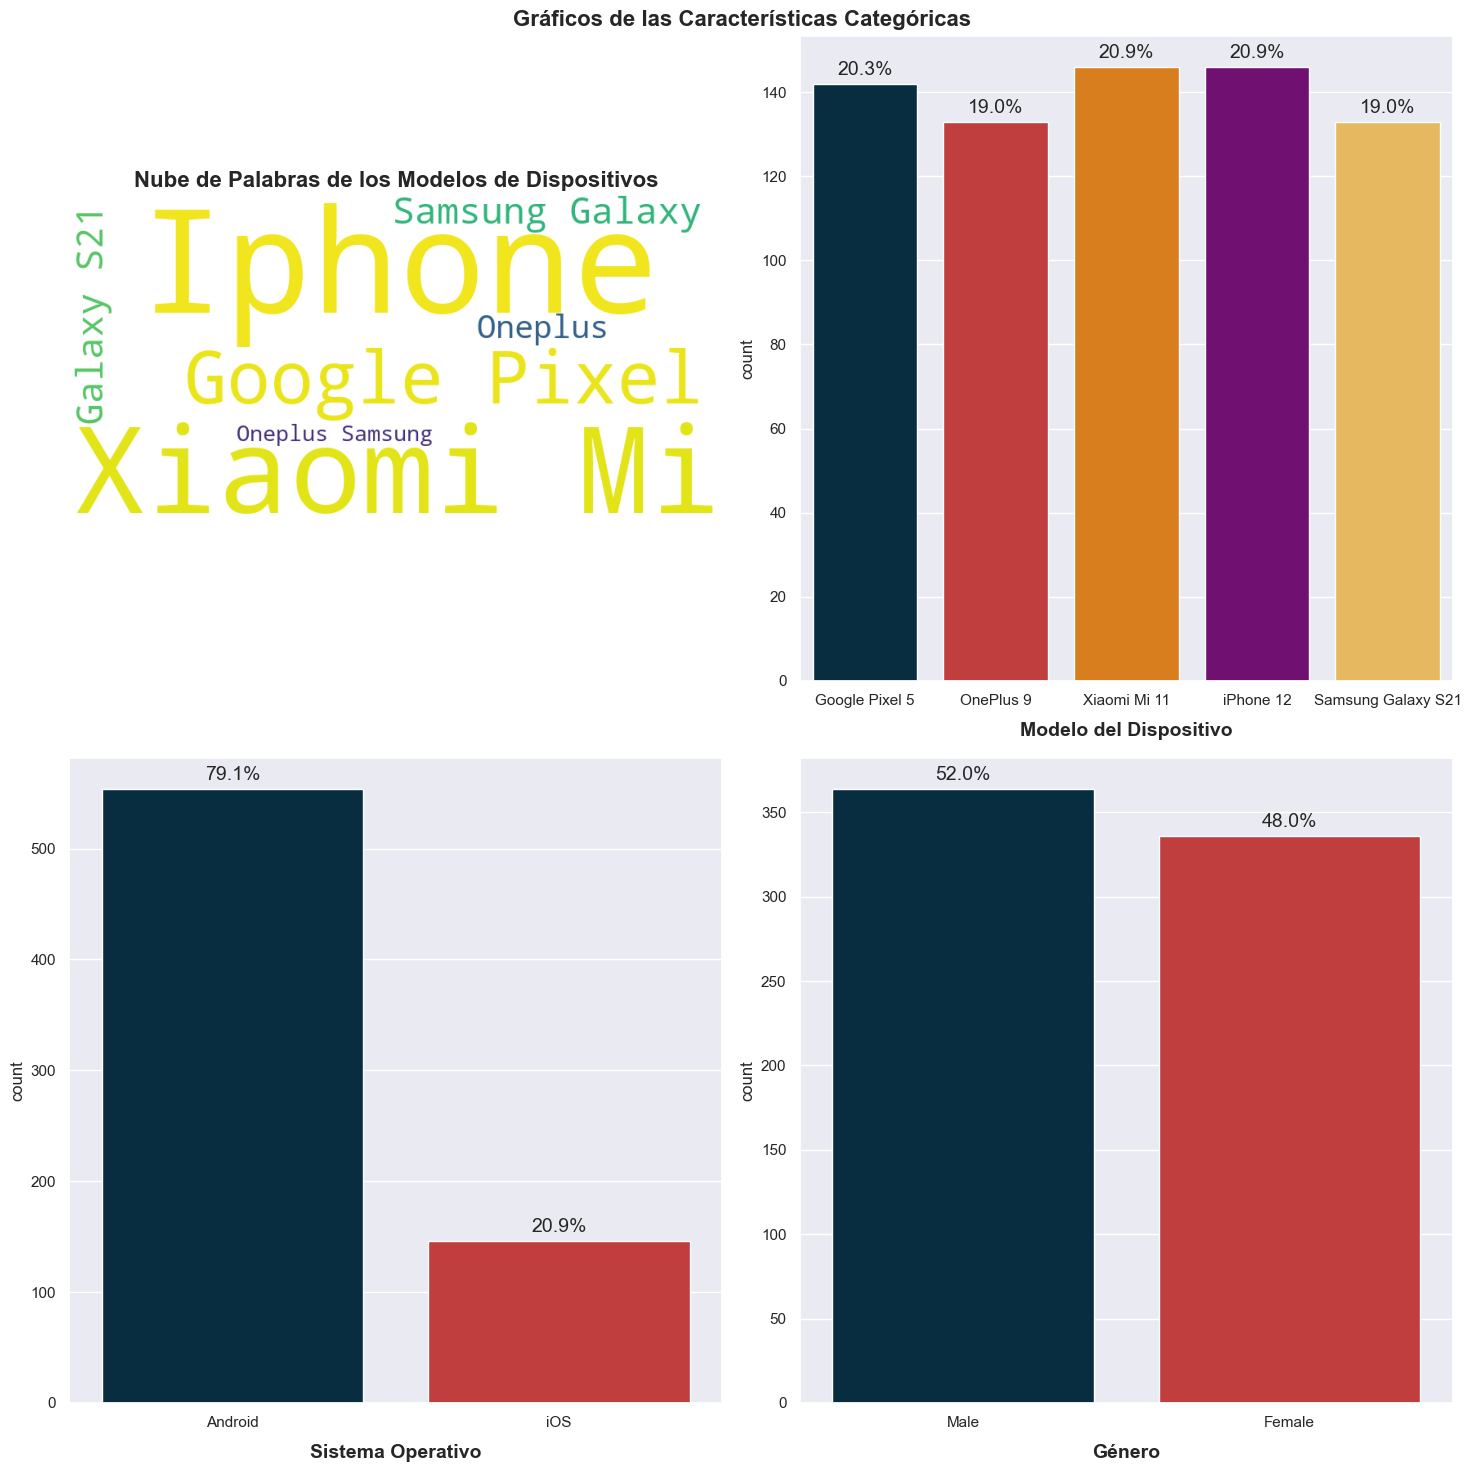

In [224]:
# Creamos una matriz de gráficos con subplots
# ==============================================================================

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Graficamos cada variable categórica
# ==============================================================================

for i, col in enumerate(df.select_dtypes(include="object").columns):
    ax = axes[i+1]
    sns.countplot(x=col, data=df, ax=ax, palette=palette)
    
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        porcentaje = f'{100 * height / total:.1f}%'
        ax.annotate(porcentaje, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)
    ax.set_xlabel(col, fontsize=14, weight='bold', labelpad=10)

# Representamos la nube de palabras de los modelos de dispositivos
# ==============================================================================

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['Modelo del Dispositivo'].str.title().str.strip()))
axes[0].imshow(wordcloud)
axes[0].axis('off')
axes[0].set_title('Nube de Palabras de los Modelos de Dispositivos', fontsize=16, weight='bold')

plt.suptitle('Gráficos de las Características Categóricas', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


De las representaciones gráficas se puede observar lo siguiente:

- Aunque los modelos de dispositivos tienen proporciones similares, se destaca una ligera predominancia de los **Xiaomi Mi 11** e **iPhone 12**, con un **20.9%** cada uno. Les sigue de cerca el **Google Pixel**, con un **20.3%**, y finalmente, los modelos **OnePlus 9** y **Samsung Galaxy S21** con un **19%** cada uno.

- En cuanto al **sistema operativo**, existe una predominancia clara de **Android**, que representa un **79.1%** de todas las observaciones. Por el contrario, **iOS** representa solo el **20.9%**, lo que indica que la mayoría de los usuarios en la muestra utilizan Android.

- Respecto al **género**, el **masculino** tiene una ligera predominancia, representando el **52%** de las observaciones, mientras que el género femenino representa el **48%**, lo que refleja una distribución casi equilibrada entre ambos géneros.

## 2.6 Análisis Bivariado

A continuación, procederemos con el análisis bivariado, que nos permitirá explorar las tendencias y patrones al comparar dos variables de nuestro conjunto de datos. Comenzaremos analizando la relación entre la edad de los usuarios y el tiempo de pantalla encendida del dispositivo, lo cual nos ayudará a identificar si existe algún patrón o comportamiento que explique cómo varía el uso del dispositivo en función de la edad de los usuarios.

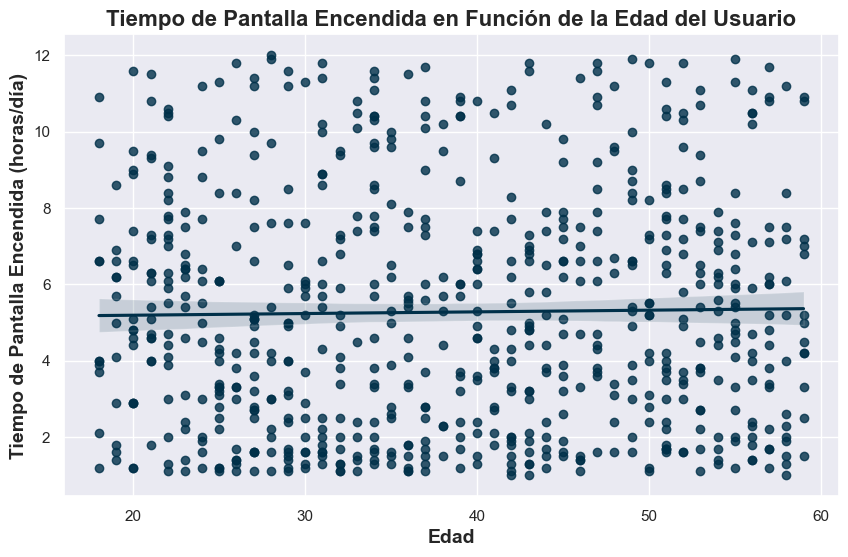

In [225]:
# Creamos un gráfico de dispersión para evaluar el tiempo de pantalla encendida en función de la edad del usuario
# ==============================================================================

plt.figure(figsize=(10, 6))
sns.regplot(x='Edad', y='Tiempo de Pantalla Encendida (horas/día)', data=df)
plt.title('Tiempo de Pantalla Encendida en Función de la Edad del Usuario', fontsize=16, weight='bold')
plt.xlabel('Edad', fontsize=14, weight='bold')
plt.ylabel('Tiempo de Pantalla Encendida (horas/día)', fontsize=14, weight='bold')
plt.show()

Podemos observar que no existe una relación significativa entre la edad del usuario y el tiempo de pantalla encendida. Los datos no muestran una tendencia clara que sugiera que a mayor o menor edad el tiempo de uso del dispositivo varíe de manera consistente. Esto indica que, independientemente de la edad, los usuarios presentan comportamientos similares en cuanto al uso de la pantalla del dispositivo, lo que sugiere que otros factores podrían estar influyendo más en este patrón de uso, como el tipo de actividad realizada, la ocupación o el contexto personal.

Ahora evaluaremos la cantidad de batería gastada en función del numero de aplicaciones instaladas en cada dispositivo.

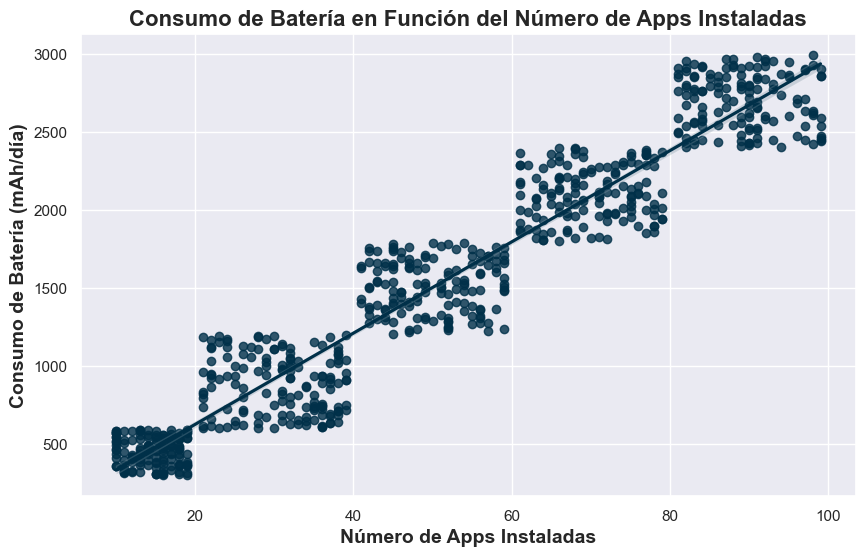

In [226]:
# Creamos un gráfico de dispersión para evaluar la cantidad de batería gastada en función del número de aplicaciones instaladas
# ==============================================================================

plt.figure(figsize=(10, 6))
sns.regplot(x='Número de Apps Instaladas', y='Consumo de Batería (mAh/día)', data=df)
plt.title('Consumo de Batería en Función del Número de Apps Instaladas', fontsize=16, weight='bold')
plt.xlabel('Número de Apps Instaladas', fontsize=14, weight='bold')
plt.ylabel('Consumo de Batería (mAh/día)', fontsize=14, weight='bold')
plt.show()

Podemos observar una relación positiva significativa entre el número de aplicaciones instaladas y el consumo de batería del dispositivo. A medida que aumenta la cantidad de aplicaciones instaladas, también se incrementa el consumo de batería. Este patrón es lógico, ya que más aplicaciones suelen implicar mayores procesos en segundo plano y un uso más intensivo de los recursos del dispositivo, lo que contribuye a un mayor consumo energético.

Esto sugiere que los usuarios con más aplicaciones instaladas probablemente interactúan más con su dispositivo o tienen más aplicaciones activas en segundo plano, lo que genera una mayor demanda de batería. Ahora procederemos a evaluar el consumo de datos del dispositivo en función del genero, esto nos permitirá comprender si varia el consumo de datos con respecto al genero de cada usuario.

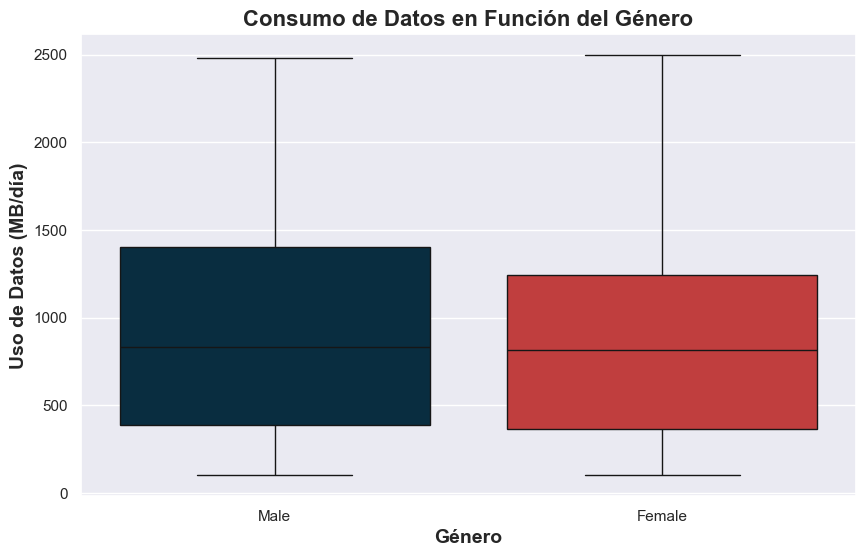

In [57]:
# Creamos un gráfico de caja para evaluar el consumo de datos en función del género
# ==============================================================================

plt.figure(figsize=(10, 6))
sns.boxplot(x='Género', y='Uso de Datos (MB/día)', data=df, palette=palette)
plt.title('Consumo de Datos en Función del Género', fontsize=16, weight='bold')
plt.xlabel('Género', fontsize=14, weight='bold')
plt.ylabel('Uso de Datos (MB/día)', fontsize=14, weight='bold')
plt.show()

Se observa que el consumo de datos es similar entre los géneros, sin diferencias significativas. Aunque hay un ligero aumento en el consumo de datos por parte del género masculino en comparación con el femenino, esta diferencia es mínima y puede ser atribuida a la aleatoriedad inherente en los datos. Ambos géneros comparten la misma mediana y otras características clave, lo que sugiere que el comportamiento en el uso de datos es esencialmente idéntico entre ambos. Por lo tanto, no parece haber un patrón significativo en el consumo de datos basado en el género.

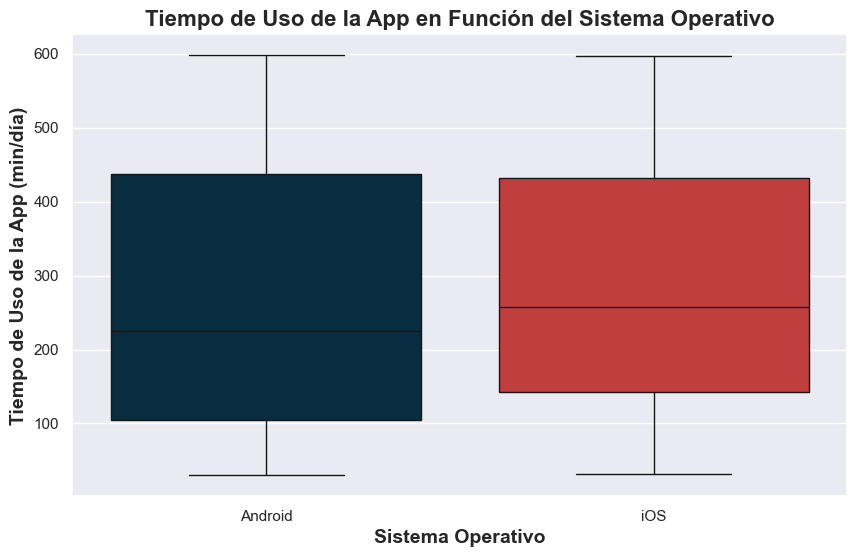

In [227]:
# Creamos un gráfico de caja para evaluar el tiempo de uso de la app en función del sistema operativo
# ==============================================================================

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sistema Operativo', y='Tiempo de Uso de la App (min/día)', data=df, palette=palette)
plt.title('Tiempo de Uso de la App en Función del Sistema Operativo', fontsize=16, weight='bold')
plt.xlabel('Sistema Operativo', fontsize=14, weight='bold')
plt.ylabel('Tiempo de Uso de la App (min/día)', fontsize=14, weight='bold')
plt.show()

Se observa un ligero aumento en el tiempo de uso de los dispositivos entre los usuarios del sistema operativo iOS en comparación con los de Android. Sin embargo, esta diferencia es mínima y no parece ser lo suficientemente significativa como para marcar una tendencia destacada entre ambos grupos. Ahora realizaremos un gráfico para representar la correlación que hay entre las variables numéricas del conjunto de datos.

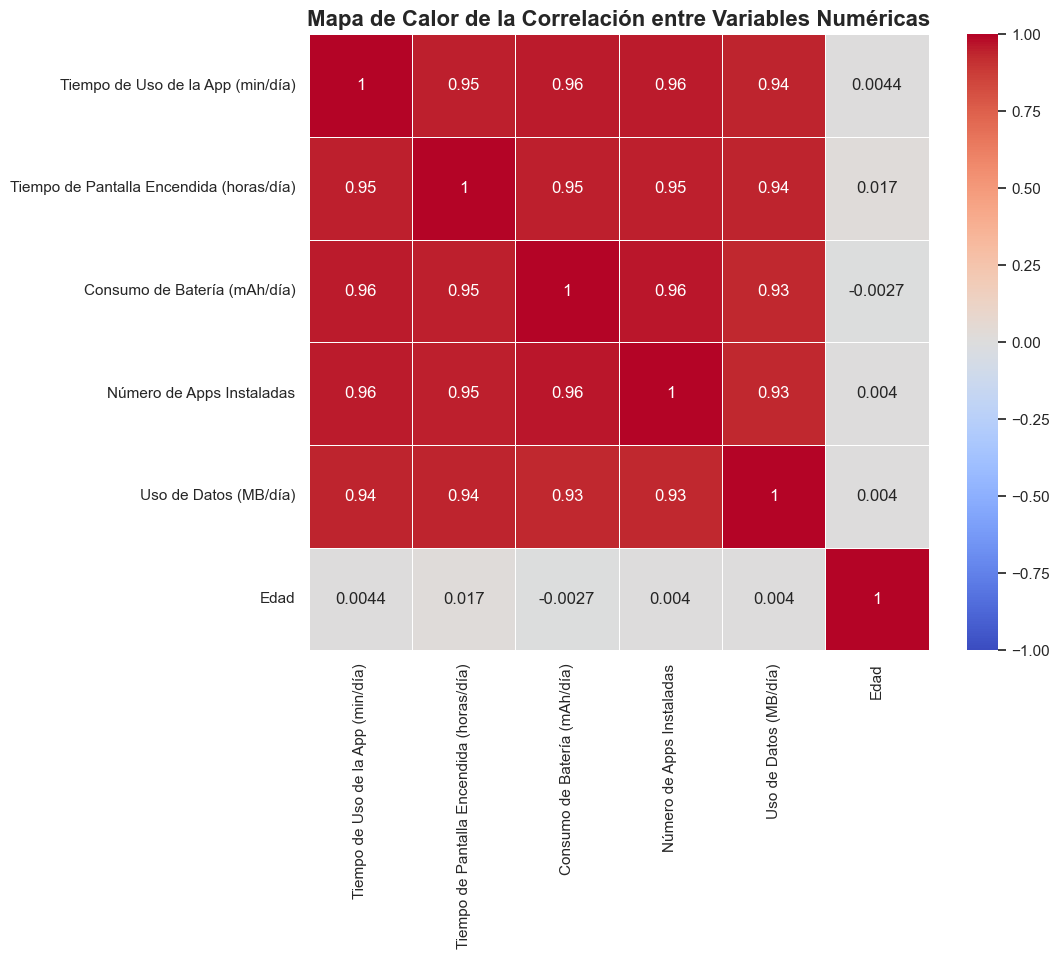

In [61]:
# Calculamos la matriz de correlación
# ==============================================================================

correlation_matrix = caracteristicas_numericas.corr()

# Creamos un mapa de calor para visualizar la matriz de correlación
# ==============================================================================

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas', fontsize=16, weight='bold')
plt.show()

Del gráfico de correlación podemos observar lo siguiente:

- La edad no tiene correlación significativa con las demás variables, ya que su valor de correlación es prácticamente 0, lo que indica que la edad no influye en las otras características del conjunto de datos.

- Las demás variables presentan correlaciones altas entre sí. Por ejemplo, existe una correlación de 0.96 entre el consumo de batería y el tiempo de uso del dispositivo, lo que sugiere que cuanto más tiempo se utiliza el dispositivo, mayor es el consumo de batería. Asimismo, hay una correlación de 0.95 entre el número de aplicaciones instaladas y el tiempo de pantalla encendida, lo que indica que los dispositivos con más aplicaciones tienden a estar más tiempo en uso.

La presencia de estas altas correlaciones entre distintas variables nos sugiere que es necesario aplicar técnicas que reduzcan la multicolinealidad, ya que esto podría generar problemas en los modelos predictivos que se implementen. Se recomienda utilizar estrategias como la reducción de dimensionalidad mediante el análisis de componentes principales (PCA), que puede ayudar a identificar las variables más relevantes y reducir la redundancia en el conjunto de datos. Esto mejoraría el rendimiento y la precisión de los modelos predictivos.

# 3. Reducción de Dimensionalidad a Través de PCA

A continuación, procederemos a realizar la reducción de dimensionalidad mediante el Análisis de Componentes Principales (PCA). Este enfoque es fundamental para simplificar nuestro conjunto de datos, facilitando la identificación de patrones y relaciones, así como mejorando el rendimiento de los modelos predictivos.

Para comenzar, es necesario realizar un mapeo numérico de las variables categóricas. Utilizaremos la técnica de One-Hot Encoding, que convertirá estas variables en un formato binario, permitiendo que sean incluidas en el análisis. Este paso es crucial, ya que muchas de las técnicas de reducción de dimensionalidad, incluido el PCA, requieren que todas las variables sean numéricas.

In [228]:
# Aplicamos la técnica de OneHotEncoder para las columnas categóricas
# ==============================================================================

categorical_columns = ['Modelo del Dispositivo', 'Sistema Operativo', 'Género']

encoder = OneHotEncoder(drop='first')
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

encoded_df.head()

,Modelo del Dispositivo_OnePlus 9,Modelo del Dispositivo_Samsung Galaxy S21,Modelo del Dispositivo_Xiaomi Mi 11,Modelo del Dispositivo_iPhone 12,Sistema Operativo_iOS,Género_Male
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0


Una vez completada la codificación de las variables categóricas, procederemos a añadirlas al conjunto de datos. Esto implica que eliminaremos las variables categóricas originales, ya que, al incluir las nuevas variables mapeadas, ya no es necesario conservar las versiones iniciales

In [229]:
# Añadimos las variables codificadas al dataframe original
# ==============================================================================

df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=categorical_columns, inplace=True)
df.head()

,Tiempo de Uso de la App (min/día),Tiempo de Pantalla Encendida (horas/día),Consumo de Batería (mAh/día),Número de Apps Instaladas,Uso de Datos (MB/día),Edad,Modelo del Dispositivo_OnePlus 9,Modelo del Dispositivo_Samsung Galaxy S21,Modelo del Dispositivo_Xiaomi Mi 11,Modelo del Dispositivo_iPhone 12,Sistema Operativo_iOS,Género_Male
0,393,6.4,1872,67,1122,40,0.0,0.0,0.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,47,1.0,0.0,0.0,0.0,0.0,0.0
2,154,4.0,761,32,322,42,0.0,0.0,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,20,0.0,0.0,0.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,31,0.0,0.0,0.0,1.0,1.0,0.0


Después de convertir las variables categóricas, es importante escalar todos los datos. La estandarización garantiza que las características con diferentes unidades de medida o rangos no influyan desproporcionadamente en el análisis. Utilizaremos la normalización Z-score, que centrará los datos en torno a la media y los escalará según su desviación estándar. Esto es especialmente relevante en el caso de PCA, ya que el método se basa en la varianza de los datos, y las variables con mayor rango podrían dominar el resultado.

In [230]:
# Escalamos los datos numéricos de un DataFrame con StandardScaler de scikit-learn 
# ==============================================================================
scaler = StandardScaler()

columnas = df.select_dtypes(include=[np.number]).columns
df[columnas] = scaler.fit_transform(df[columnas])

df.head()

,Tiempo de Uso de la App (min/día),Tiempo de Pantalla Encendida (horas/día),Consumo de Batería (mAh/día),Número de Apps Instaladas,Uso de Datos (MB/día),Edad,Modelo del Dispositivo_OnePlus 9,Modelo del Dispositivo_Samsung Galaxy S21,Modelo del Dispositivo_Xiaomi Mi 11,Modelo del Dispositivo_iPhone 12,Sistema Operativo_iOS,Género_Male
0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,-0.484322,-0.484322,-0.513359,-0.513359,-0.513359,0.960769
1,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,2.064742,-0.484322,-0.513359,-0.513359,-0.513359,-1.040833
2,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,-0.484322,-0.484322,1.947953,-0.513359,-0.513359,0.960769
3,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,-0.484322,-0.484322,-0.513359,-0.513359,-0.513359,0.960769
4,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,-0.484322,-0.484322,-0.513359,1.947953,1.947953,-1.040833


Una vez que hemos mapeado todas las variables categóricas y escalado los datos, procederemos a aplicar el análisis de componentes principales (PCA). Durante este proceso, también indicaremos la cantidad de varianza que explica cada componente principal. El objetivo es capturar la mayor parte de la varianza de los datos utilizando el menor número posible de características, lo que nos permitirá simplificar el modelo y mejorar su interpretabilidad sin perder información relevante.

In [231]:
# Aplicamos PCA para la reducción de dimensionalidad
# ==============================================================================

pca = PCA()
caracteristicas_pca = pca.fit_transform(X)

varianza_explicada = pca.explained_variance_ratio_

for i, varianza in enumerate(varianza_explicada):
    print(f'Componente Principal {i+1}: {varianza:.4f}')

Componente Principal 1: 0.6790
Componente Principal 2: 0.1419
Componente Principal 3: 0.0519
Componente Principal 4: 0.0362
Componente Principal 5: 0.0280
Componente Principal 6: 0.0268
Componente Principal 7: 0.0108
Componente Principal 8: 0.0076
Componente Principal 9: 0.0066
Componente Principal 10: 0.0060
Componente Principal 11: 0.0052
Componente Principal 12: 0.0000


Podemos observar que hay 12 componentes principales, cada uno de los cuales explica una proporción diferente de la varianza en el conjunto de datos. Dado que el objetivo de la reducción de dimensionalidad es simplificar el conjunto de variables mientras se pierde la menor cantidad de información posible, generalmente se busca mantener al menos el 95% de la varianza total explicada. Por lo tanto, seleccionaremos aquellos componentes que, en conjunto, representen al menos el 95% de la información. Estos componentes seleccionados serán las variables resultantes tras aplicar el proceso de reducción de dimensionalidad.

In [232]:
# Calculamos la varianza acumulada
# ==============================================================================

varianza_acumulada = np.cumsum(varianza_explicada)

# Determinamos el número de componentes necesarios para explicar al menos el 95% de la varianza
# ==============================================================================

num_componentes = np.argmax(varianza_acumulada >= 0.95) + 1

print(f'Número de componentes principales que explican al menos el 95% de la varianza: {num_componentes}')
pca_95 = PCA(n_components=num_componentes)
caracteristicas_pca_95 = pca_95.fit_transform(X)

varianza_explicada_95 = pca_95.explained_variance_ratio_
print(f'Varianza explicada por los {num_componentes} componentes principales: {varianza_explicada_95}')

Número de componentes principales que explican al menos el 95% de la varianza: 6
Varianza explicada por los 6 componentes principales: [0.67900514 0.14189992 0.05187731 0.03623485 0.02798316 0.02679507]


Una vez seleccionados los componentes principales, en este caso seis componentes, podemos explicar al menos el 95% de la variabilidad de los datos. Esto es significativo porque garantiza que hemos conservado la mayor parte de la información relevante del conjunto original, lo que nos ayudará a evitar la sobreajuste y mejorar el rendimiento de los modelos predictivos.

Procederemos a convertir estos componentes en un DataFrame, lo que facilitará su manejo y análisis posterior. Al tener este DataFrame estructurado, será más sencillo integrarlo en diferentes algoritmos de modelado, permitiendo una implementación ágil y eficiente de modelos predictivos

In [233]:
# Creamos un DataFrame con los 6 componentes principales de PCA que explican al menos el 95% de la varianza 
# ==============================================================================

df_pca_95 = pd.DataFrame(caracteristicas_pca_95, columns=[f'Componente Principal {i+1}' for i in range(num_componentes)])
df_pca_95.head()

,Componente Principal 1,Componente Principal 2,Componente Principal 3,Componente Principal 4,Componente Principal 5,Componente Principal 6
0,1.067156,0.119081,-0.205852,-0.436271,0.078640,-0.083479
1,-0.335027,0.709586,-0.317532,0.472794,-0.714260,-0.480082
2,-1.633942,0.284565,-0.404549,-0.184515,0.841911,-0.267296
3,-0.026162,-1.544817,-0.166395,-0.473662,0.065353,-0.070268
4,-0.271306,-0.607598,1.219490,0.375643,-0.089735,0.099248


La aplicación de la reducción de dimensionalidad a través del análisis de componentes principales (PCA) es un paso importante, ya que nos ayuda a simplificar nuestros datos sin perder información valiosa. Al reducir la cantidad de variables, facilitamos el proceso de análisis y modelado, lo que puede llevar a modelos más rápidos y eficientes. Además, al mantener la mayor parte de la variabilidad de los datos, aumentamos la probabilidad de que nuestros modelos sean precisos y generalizables.

# Referencias Bibliográficas

- Batista Foguet, J. M., & Valls i Colom, M. (1985). Técnicas gráficas en análisis exploratorio de datos. Qüestiió. 1985, vol. 9, núm. 3.

- de Corso Sicilia, G. B., & Rivera, M. P. (2017). Métodos gráficos de análisis exploratorio de datos espaciales con variables espacialmente distribuidas. Cuadernos latinoamericanos de administración, 13(25), 92-104.

- Maćkiewicz, A., & Ratajczak, W. (1993). Principal components analysis (PCA). Computers & Geosciences, 19(3), 303-342.

- Ringnér, M. (2008). What is principal component analysis?. Nature biotechnology, 26(3), 303-304.